In [158]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/super-market-sales/supermarket_sales.csv


In [159]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [160]:
df=pd.read_csv("/kaggle/input/super-market-sales/supermarket_sales.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [161]:
#data cleaning null 
print(df.isnull().sum())
print(df.shape)

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64
(1000, 17)


In [162]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [163]:
#duplicates droping
df.drop_duplicates(inplace=True)

In [164]:
#Branch info
df['Branch'].value_counts()
Branch = df.groupby("Branch")["Quantity"].sum().sort_values(ascending=False)
print(Branch)


Branch
A    1859
C    1831
B    1820
Name: Quantity, dtype: int64


In [165]:
#cities 
df['City'].value_counts()
City=df.groupby("City")["Quantity"].sum().sort_values(ascending=False)
print(City)

City
Yangon       1859
Naypyitaw    1831
Mandalay     1820
Name: Quantity, dtype: int64


In [166]:
#customer types
df['Customer type'].value_counts()

Customer type
Member    501
Normal    499
Name: count, dtype: int64

In [167]:
#gender
#print(len(df))
df["Gender"] = df["Gender"].replace({"Male": 0, "Female": 1})
#print(df.Gender)
df["Gender"].value_counts()

<ipython-input-167-9a405dfce431>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"] = df["Gender"].replace({"Male": 0, "Female": 1})


Gender
1    501
0    499
Name: count, dtype: int64

In [168]:
#taking what products more
fast_selling_products = df.groupby("Product line")["Quantity"].sum().sort_values(ascending=False)
print(fast_selling_products)

Product line
Electronic accessories    971
Food and beverages        952
Sports and travel         920
Home and lifestyle        911
Fashion accessories       902
Health and beauty         854
Name: Quantity, dtype: int64


In [169]:
#print(df.Payment)
df['Payment'].value_counts()
Payment = df.groupby("Payment")["Quantity"].sum().sort_values(ascending=False)
print(Payment)

Payment
Cash           1896
Ewallet        1892
Credit card    1722
Name: Quantity, dtype: int64


In [170]:
#date
df["Date"] = pd.to_datetime(df["Date"])
#print(df.Date)
df['Date'].value_counts()


Date
2019-02-07    20
2019-02-15    19
2019-03-14    18
2019-03-02    18
2019-01-08    18
              ..
2019-01-04     6
2019-02-28     6
2019-02-21     6
2019-03-17     6
2019-02-01     6
Name: count, Length: 89, dtype: int64

In [171]:
#time 
print(df.Time)
df['Time'].value_counts()

0      13:08
1      10:29
2      13:23
3      20:33
4      10:37
       ...  
995    13:46
996    17:16
997    13:22
998    15:33
999    13:28
Name: Time, Length: 1000, dtype: object


Time
19:48    7
14:42    7
17:38    6
17:16    5
11:40    5
        ..
13:26    1
11:17    1
14:57    1
17:53    1
19:12    1
Name: count, Length: 506, dtype: int64

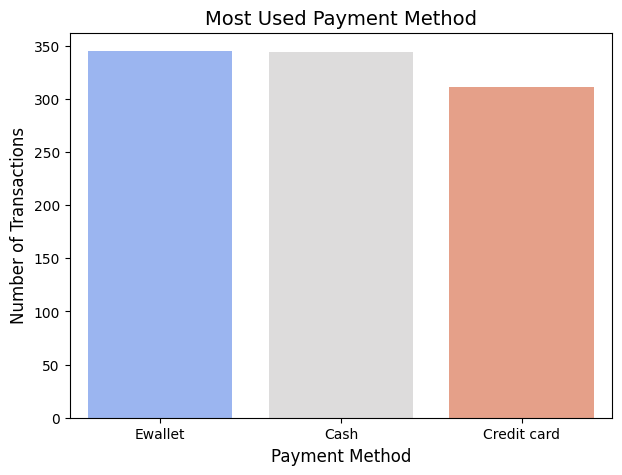

In [172]:
#for payment
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5))
sns.countplot(x=df["Payment"], palette="coolwarm")

plt.title("Most Used Payment Method", fontsize=14)
plt.xlabel("Payment Method", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)

plt.show()


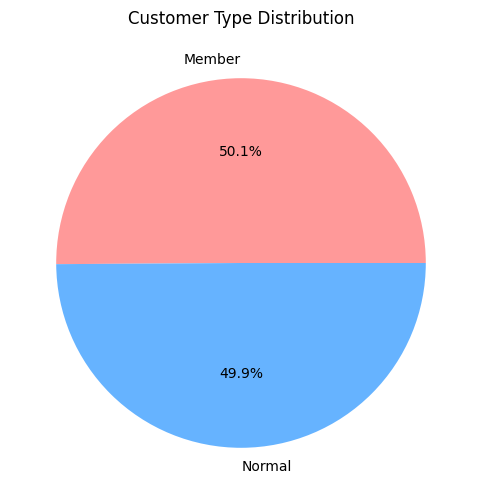

In [173]:
#customer type
plt.figure(figsize=(6, 6))
df["Customer type"].value_counts().plot.pie(autopct="%1.1f%%", colors=["#ff9999", "#66b3ff"])

plt.title("Customer Type Distribution")
plt.ylabel("")  # Hide ylabel

plt.show()


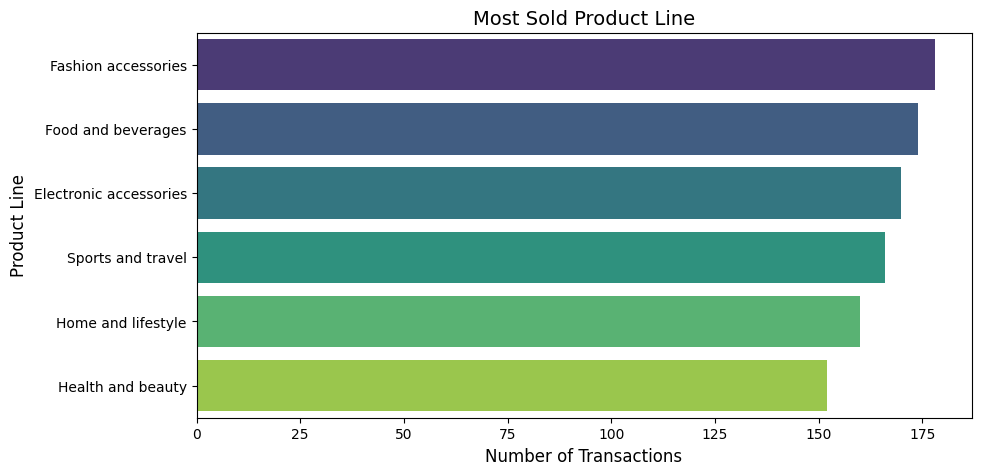

In [174]:
#bar charts product line
plt.figure(figsize=(10, 5))
sns.countplot(y=df["Product line"], order=df["Product line"].value_counts().index, palette="viridis")

plt.title("Most Sold Product Line", fontsize=14)
plt.xlabel("Number of Transactions", fontsize=12)
plt.ylabel("Product Line", fontsize=12)

plt.show()


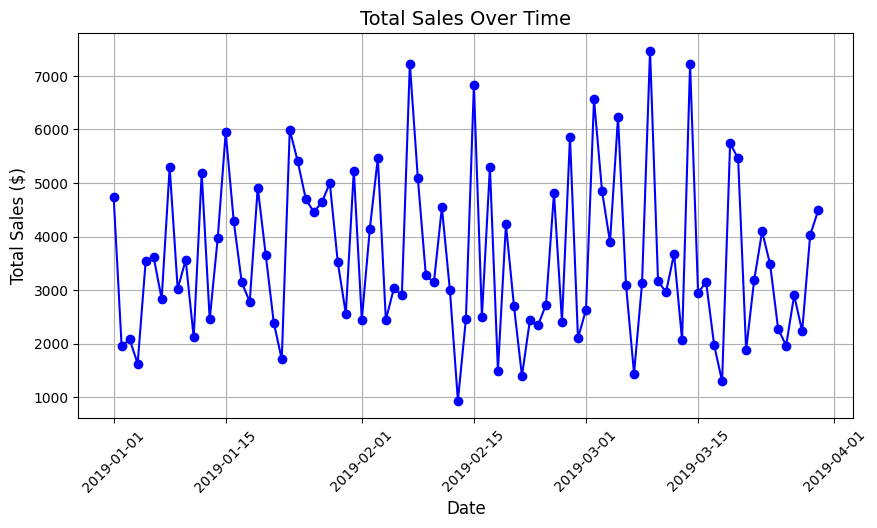

In [175]:
#Line Plot: Sales Trend
df["Date"] = pd.to_datetime(df["Date"])  # Convert to Date format
daily_sales = df.groupby("Date")["Total"].sum()

plt.figure(figsize=(10, 5))
plt.plot(daily_sales.index, daily_sales.values, marker="o", color="b")

plt.title("Total Sales Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Sales ($)", fontsize=12)

plt.xticks(rotation=45)
plt.grid()

plt.show()


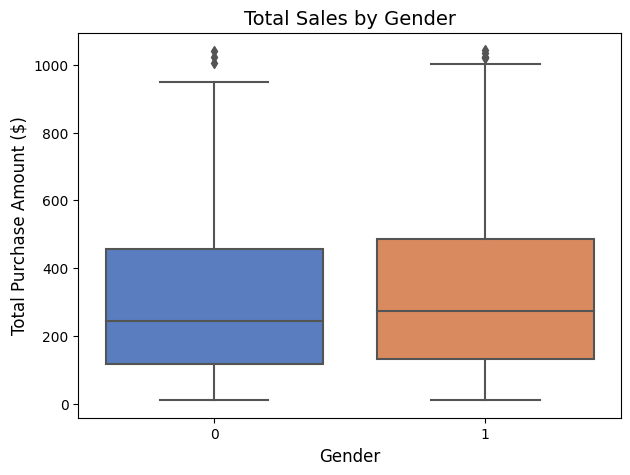

In [176]:
#sales by gender
plt.figure(figsize=(7, 5))
sns.boxplot(x=df["Gender"], y=df["Total"], palette="muted")

plt.title("Total Sales by Gender", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Total Purchase Amount ($)", fontsize=12)

plt.show()


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


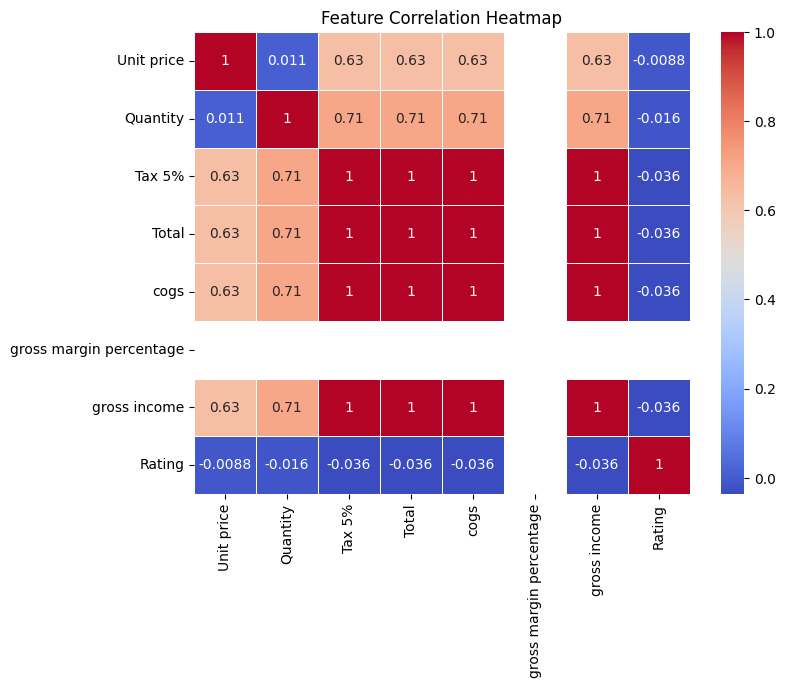

In [177]:
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)

plt.title("Feature Correlation Heatmap")
plt.show()
